## Inventory Optimization with Dynamic Programming in Less than 100 Python code

### Part 3: Implementing the Dynamic Programming for Inventory Optimization.

In [23]:
from rich import pretty
pretty.install()

In first part of series on Inventory Optimization, a Markov Process was covered. Essentilally Markov Process was introduced to provide model of the states, how to model the transition of states in Inventory Optimization problem.

In the second part it was dicussed how fixes policy, can make Markoe reward Processs. The main goal of the second part was to follow Bellman Equation on how to find the Immediate reward and Value function for each state.


### Markov Decision Process

In this article, we are going to summarize everything and couple Markov process and MArkov Reward Process with **Markov Decision Process**.

Markov Decision Process is a  process, where all decsions are condidered for each state. In other words, we are going to consider all possible actions for each state.

In Markov Reward Process , the decsion were fixed, and we were not considering all possible actions for each state. In MDP, we need to build a data structure that for each state, we need to consider all possible actions, and following the $(S_t,A_t)$, we need to know what will be $(S_{t+1}, R_{t+1})$.

#### Example of Markov Decision Process Data Structure

Here I am giving you an example of MDP dictionary, where as you can see for each state, all possible actions need to be considred, and 

In [2]:

MarkovDecProcessDict = {"Current State A":{"Action 1":{("NextS1fromAact1", "Reward"): "PNextS1fromAact1"
                                           ,("NextS2fromAact1", "Reward"): "PNextS2fromAact1"},
                                           "Action 2":{("NextS1fromAact2", "Reward"): "PNextS1fromAact2"
                                           ,("NextS2fromAact2", "Reward"): "PNextS2fromAact2"}},
                    
                     "Current State B":{"Action 1":{("NextS1fromBact1", "Reward"): "PNextS1fromBact1"
                                           ,("NextS2fromBact1", "Reward"): "PNextS2fromBact1"},
                                           "Action 2":{("NextS1fromBact2", "Reward"): "PNextS1fromBact2"
                                           ,("NextS2fromBact2", "Reward"): "PNextS2fromBact2"}}
}

for current_state, actions in MarkovDecProcessDict.items():
    print(f"Current: {current_state}")
    
    for action, transitions in actions.items():
        print(f"  Action: {action}")
        
        for (next_state, reward), probability in transitions.items():
            print(f"  ({next_state},{reward}): {probability}")

Current: Current State A
  Action: Action 1
  (NextS1fromAact1,Reward): PNextS1fromAact1
  (NextS2fromAact1,Reward): PNextS2fromAact1
  Action: Action 2
  (NextS1fromAact2,Reward): PNextS1fromAact2
  (NextS2fromAact2,Reward): PNextS2fromAact2
Current: Current State B
  Action: Action 1
  (NextS1fromBact1,Reward): PNextS1fromBact1
  (NextS2fromBact1,Reward): PNextS2fromBact1
  Action: Action 2
  (NextS1fromBact2,Reward): PNextS1fromBact2
  (NextS2fromBact2,Reward): PNextS2fromBact2


## MDP for Inventory Optimization

In the first sarticle, we dicussed Markov Process for Inventory Optimization.In the second artcile we dicussed Markov reward Polciy for one **fixed policy** and found what are the state value function of state, if we follow that policy. But, then the question we asked is "How to find the best policy"?. To answer that question we are coing to markov Process and here we are building the dictionary, where for each state, we are considering all possible actions, and for each action, we are considering all possible states and rewards.

This ditionary name is **MDP_dict** and I wrote hands-one code of it below:


In [3]:
from typing import Dict, Tuple

# poisson is used to find pdf of Poisson distribution 
from scipy.stats import poisson

from rich import pretty
pretty.install()

MDP_dict: Dict[tuple, Dict[tuple, tuple]] = {}

user_capacity = 2
user_poisson_lambda = 1
holding_cost = 1
missedcostumer_cost = 10



for alpha in range(user_capacity+1):                            
                                                               
    for beta in range(user_capacity + 1 - alpha):
        
        # This is St, the current state
        state = (alpha, beta)                                   

        # This is initial inventory, total bike you have at 8AM 
        init_inv = alpha + beta                         
        
        # The beta1 is the beta in next state, irrespctive of current state (as the decsion policy is constant)
        #beta1 = user_capacity - init_inv
        
        base_reward = -alpha* holding_cost
        # List of all possible demand you can get
        
        #dict1 = {}
        action = {}
        # Consider all possible actions
        for order in range(user_capacity-init_inv +1):
            
            #action = {}
            dict1 = {}
            for i in range(init_inv +1):

            # if initial demand can meet the deman
                if i <= (init_inv-1):
                
                # probality of specifc demand can happen
                    transition_prob = poisson.pmf(i,user_poisson_lambda)

                    dict1[((init_inv - i, order), base_reward)] = transition_prob

                         
            # if initial demand can not meet the demand
                else:
                
                    transition_prob = 1- poisson.cdf(init_inv -1, user_poisson_lambda)
                
                # probability of not meeting the demands
                    transition_prob2 = 1- poisson.cdf(init_inv, user_poisson_lambda)
                
                # total reward
                
                    reward = base_reward - missedcostumer_cost*((user_poisson_lambda*transition_prob) - \
                                                  init_inv*transition_prob2)                

                    dict1[((init_inv - i, order),reward)] = transition_prob

                    #if state in MDP_dict:

            action[order] = dict1

        MDP_dict[state]= action

MDP_dict
# Constants


{
    (0, 0): {
        0: {((0, 0), -10.0): 1.0},
        1: {((0, 1), -10.0): 1.0},
        2: {((0, 2), -10.0): 1.0}
    },
    (0, 1): {
        0: {
            ((1, 0), 0): 0.3678794411714424,
            ((0, 0), -3.6787944117144225): 0.6321205588285576
        },
        1: {
            ((1, 1), 0): 0.3678794411714424,
            ((0, 1), -3.6787944117144225): 0.6321205588285576
        }
    },
    (0, 2): {
        0: {
            ((2, 0), 0): 0.3678794411714424,
            ((1, 0), 0): 0.3678794411714424,
            ((0, 0), -1.03638323514327): 0.26424111765711533
        }
    },
    (1, 0): {
        0: {
            ((1, 0), -1): 0.3678794411714424,
            ((0, 0), -4.6787944117144225): 0.6321205588285576
        },
        1: {
            ((1, 1), -1): 0.3678794411714424,
            ((0, 1), -4.6787944117144225): 0.6321205588285576
        }
    },
    (1, 1): {
        0: {
            ((2, 0), -1): 0.3678794411714424,
            ((1, 0), -1): 0.3678794411714424,
            ((0, 0), -2.03638323514327): 0.26424111765711533
        }
    },
    (2, 0): {
        0: {
            ((2, 0), -2): 0.3678794411714424,
            ((1, 0), -2): 0.3678794411714424,
            ((0, 0), -3.03638323514327): 0.26424111765711533
        }
    }
}

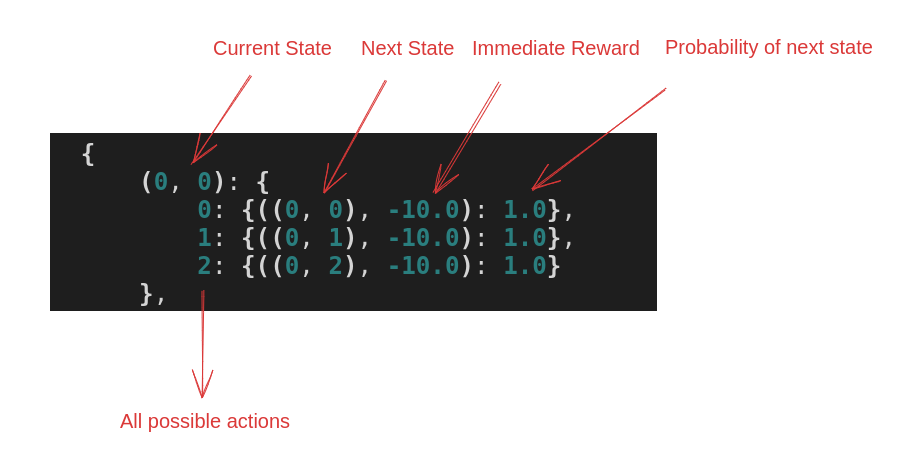

In [4]:
from IPython.display import Image, display
display(Image(filename="Img/explainmDPdic.png"))

## Dynamic Programming

Richard Bellman (1950s) first coined the term called **Dynamic Programming**. Dynamic Programming is a method for solving complex problems by breaking them down into simpler subproblems. 

DP generally refers to genral theories of MArkov decion Process , and algorithm to find optimal policy in MDB , relying heaviliy on Bellman Equation.

In the context of this artcile, we use term Dynamic Programming with the goal of finding the optimal policy for Inventory Optimization problem. There are genarlly two import DP alghrotithm namesl:

-  Value Function Iteration Alghorithm (Bellman 1957)
-  Policy Iteration Alghorithm (Howard 1960)

In this article, we are going to focus on Policy Iteration Algorithm and we are going to implement it in Python.




## Policy Iteration Algorithm for Inventory Optimization: 

Policy iteration alghorithm is a method for finding the optimal policy for a given MDP. The algorithm is based on the following idea:

- 1) Start with an initial policy $\pi_0$.
- 2) Evaluate the policy $\pi_0$ by computing the state-value function $V^{\pi_0}$.
- 3) Improve the policy by acting greedily with respect to $V^{\pi_0}$ to get a new policy $\pi_1$.

The algorithm iterates on the above steps until the policy converges (stopes to change). We are going to g through all three stages in the following sections.

### 1) Start with Initial Policy

Policy iteraton algorith needs a initial policy , which can be any arbitarary policy. In this article, we are going to use the policy that we found in the second article, which is the following:
Initial policy:

$$\pi_0=C-(\alpha + \beta)$$

What the initial policy is that at each state of the inventory, we order the amount of $C-(\alpha + \beta)$, which is the difference between the capacity of the inventory and the sum of initial items in the inventory ($\alpha$) and the ones will come tomorrow moorning ($\beta$) .

Here is the code for the initial policy:



In [5]:
user_capacity_val = 2

def policy_0_gen(user_capacity: int):
        
        # Generate an initial policy

        return {(alpha, beta): user_capacity - (alpha + beta) 
                for alpha in range(user_capacity + 1) 
                for beta in range(user_capacity + 1 - alpha)}

policy_0 = policy_0_gen(user_capacity_val)
policy_0

{(0, 0): 2, (0, 1): 1, (0, 2): 0, (1, 0): 1, (1, 1): 0, (2, 0): 0}

### 2) Evaluate the policy $\pi_0$ by computing the state-value function $V^{\pi_0}$.


I would like to say that any MarkoW Decsion Process with fixed policy lead to a **implied** MArkov Rewad Process. So, like previous articel, if we have mArkov Reward Process, we can find the state value function for each state.
In another word:

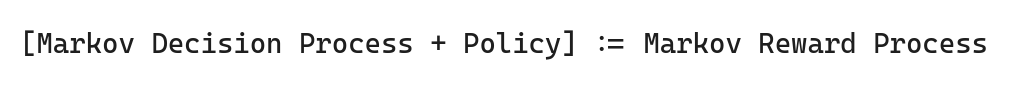

In [6]:
from IPython.display import Image, display
display(Image(filename="Img/mdp_to_mrp.png"))

The below function will get a **fixed policy**, then it will return a implied Markov Reward Process:   

In [7]:
def MRP_using_fixedPolicy(full_MDP, policy):
        # Calculate the Markov Reward Process using a fixed policy
        MRP_policy = {}
        for state in full_MDP.keys():
            action = policy[state]
            MRP_policy[state] = full_MDP[state][action]
        return MRP_policy

As an example, we can give the initial policy to the below function, and it will return the implied Markov Reward Process:

In [8]:
MRP_p0=MRP_using_fixedPolicy(MDP_dict, policy_0)
MRP_p0

{
    (0, 0): {((0, 2), -10.0): 1.0},
    (0, 1): {
        ((1, 1), 0): 0.3678794411714424,
        ((0, 1), -3.6787944117144225): 0.6321205588285576
    },
    (0, 2): {
        ((2, 0), 0): 0.3678794411714424,
        ((1, 0), 0): 0.3678794411714424,
        ((0, 0), -1.03638323514327): 0.26424111765711533
    },
    (1, 0): {
        ((1, 1), -1): 0.3678794411714424,
        ((0, 1), -4.6787944117144225): 0.6321205588285576
    },
    (1, 1): {
        ((2, 0), -1): 0.3678794411714424,
        ((1, 0), -1): 0.3678794411714424,
        ((0, 0), -2.03638323514327): 0.26424111765711533
    },
    (2, 0): {
        ((2, 0), -2): 0.3678794411714424,
        ((1, 0), -2): 0.3678794411714424,
        ((0, 0), -3.03638323514327): 0.26424111765711533
    }
}

Having the Markov Reward Process, it is quite easy to find Immediate Rewards for each state, and also the state value function for each state:

In [9]:
def calculate_expected_immediate_rewards(MRP_policy):
        # Calculate the expected immediate rewards from the MRP policy
        E_immediate_R = {}
        for from_state, value in MRP_policy.items():
            expected_reward = sum(reward[1] * prob for (reward, prob) in value.items())
            E_immediate_R[from_state] = expected_reward
        return E_immediate_R

In [10]:
R_ime_p0 = calculate_expected_immediate_rewards(MRP_p0)
R_ime_p0

{
    (0, 0): -10.0,
    (0, 1): -2.325441579348295,
    (0, 2): -0.2738550643753546,
    (1, 0): -3.325441579348295,
    (1, 1): -1.2738550643753548,
    (2, 0): -2.273855064375355
}

In [11]:
import numpy as np
import pandas as pd
def create_transition_probability_matrix(MRP_policy):
        # Create the transition probability matrix
        states = list(MRP_policy.keys())
        num_states = len(states)
        trans_prob = np.zeros((num_states, num_states))
        df_trans_prob = pd.DataFrame(trans_prob, columns=states, index=states)
        for i, from_state in enumerate(states):
            for j, to_state in enumerate(states):
                for (new_state, reward) in MRP_policy.get(from_state, {}):
                    if new_state == to_state:
                        probability = MRP_policy[from_state].get((new_state, reward), 0.0)
                        df_trans_prob.iloc[i, j] = probability
                        
        return df_trans_prob

def calculate_state_value_function(trans_prob_mat, expected_immediate_rew, gamma=0.9):
        # Calculate the state value function
        states = list(expected_immediate_rew.keys())
        R_exp = np.array(list(expected_immediate_rew.values()))
        val_func_vec = np.linalg.solve(np.eye(len(R_exp)) - gamma * trans_prob_mat, R_exp)
        MarkRevData = pd.DataFrame({'Expected Immediate Reward': R_exp, 'Value Function': val_func_vec}, 
                                   index=states)
        return MarkRevData

trans_prob_p0 = create_transition_probability_matrix(MRP_p0)

state_val_p0 = calculate_state_value_function(trans_prob_mat=trans_prob_p0,
                               expected_immediate_rew=R_ime_p0)
state_val_p0

,Expected Immediate Reward,Value Function
"(0, 0)",-10.000000,-35.510604
"(0, 1)",-2.325442,-27.932260
"(0, 2)",-0.273855,-28.345116
"(1, 0)",-3.325442,-28.932260
"(1, 1)",-1.273855,-29.345116
"(2, 0)",-2.273855,-30.345116


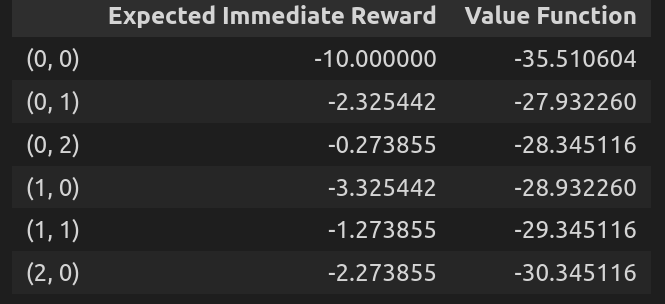

In [12]:
from IPython.display import Image, display
display(Image(filename="Img/state_immdiate_p0.png"))

### 3) Improve the policy by acting greedily with respect to $V^{\pi_0}$ to get a new policy $\pi_1$.


The last part of the Policy iteration alghorithm is to improve the policy by acting greedily with respect to $V^{\pi_0}$ to get a new policy $\pi_1$.

The greedy equation is heaviliy based on Bellman Equation, and in fact it is about finding the action with highest **State-Value** function for each state

$$\arg\max_{a} \left\{ \overline{R}(s,a) + \gamma \sum_{s' \in \mathcal{N}}\mathbb{P}(S_{t+1}=s'|S_t=s, a_t=a)V(S_{t+1}=s') \right\}$$


Here is the code for the greedy operation:

In [13]:
def greedy_operation(MDP_full, state_val_policy, old_policy, gamma=0.9):
        # Perform the greedy operation to improve the policy
        new_policy = {}
        for state in old_policy.keys():
            max_q_value, best_action  = float('-inf'), None
            state_val_dict = state_val_policy.to_dict(orient="index")
            for action in MDP_full[state].keys():
                q_value = 0
                for (next_state, immediate_reward), probability in MDP_full[state][action].items():
                    q_value = q_value +  probability * (immediate_reward + gamma *
                        (state_val_dict[next_state]["Value Function"]))
                if q_value > max_q_value:
                    max_q_value, best_action = q_value, action
            new_policy[state] = best_action
        return new_policy

In [14]:
new_policy = greedy_operation(MDP_full=MDP_dict, 
                              state_val_policy=state_val_p0, 
                              old_policy=policy_0)

The new policy after first itearation of the poliy iteration alghorithm is the following:

In [15]:
new_policy

{(0, 0): 1, (0, 1): 1, (0, 2): 0, (1, 0): 1, (1, 1): 0, (2, 0): 0}

In Policy Iteration alghorthm, we keep iteration on the above three steps, until the policy converges. In other words, we keep iterating on the above three steps, until the policy stops to change. Here is the code for the Policy Iteration Alghorithm:

In [16]:
def policy_iteration():
        # Perform policy iteration to find the optimal policy
        policy = policy_0_gen(user_capacity_val)
        while True:
            MRP_policy_p0 = MRP_using_fixedPolicy(MDP_dict, policy)
            expected_immediate_rew = calculate_expected_immediate_rewards(MRP_policy_p0)
            trans_prob_mat_val = create_transition_probability_matrix(MRP_policy_p0)
            value_function = calculate_state_value_function(trans_prob_mat=trans_prob_mat_val,
                                                            expected_immediate_rew=expected_immediate_rew,
                                                            gamma=0.9)
            new_policy = greedy_operation(MDP_full=MDP_dict, 
                                          state_val_policy=value_function, 
                                          old_policy=policy)
            if new_policy == policy:
                break
            policy = new_policy
        
        opt_policy = new_policy
        opt_value_func = value_function
        
        return opt_policy, opt_value_func


In [17]:
opt_policy, opt_val = policy_iteration()

## What is the Optimal Order?

Now, we can look on outcome of policy iteration and see what is the optimal order for each state. Here is the code for it:


In [18]:
for state, order_quantity in opt_policy.items():
    print(f"For state {state}, the optimal order quantity is: {order_quantity}")


For state (0, 0), the optimal order quantity is: 1
For state (0, 1), the optimal order quantity is: 1
For state (0, 2), the optimal order quantity is: 0
For state (1, 0), the optimal order quantity is: 1
For state (1, 1), the optimal order quantity is: 0
For state (2, 0), the optimal order quantity is: 0


## Putting Everything Together: 

In [19]:
import numpy as np
from scipy.stats import poisson
import pandas as pd

class MarkovDecisionProcess:
    def __init__(self, user_capacity, poisson_lambda, holding_cost, stockout_cost, gamma):
        # Initialize the MDP with given parameters
        self.user_capacity = user_capacity
        self.poisson_lambda = poisson_lambda
        self.holding_cost, self.stockout_cost = holding_cost, stockout_cost
        self.gamma = gamma
        self.full_MDP = self.create_full_MDP()  # Create the full MDP

    def create_full_MDP(self):
        # Create the full MDP dictionary
        MDP_dict = {}
        for alpha in range(self.user_capacity + 1):
            for beta in range(self.user_capacity + 1 - alpha):
                state, init_inv = (alpha, beta), alpha + beta 
                action = {}
                for order in range(self.user_capacity - init_inv + 1):
                    dict1 = {}
                    for i in range(init_inv + 1):
                        if i <= (init_inv - 1):
                            transition_prob = poisson.pmf(i, self.poisson_lambda)
                            dict1[((init_inv - i, order), -alpha * self.holding_cost)] = transition_prob
                        else:
                            transition_prob = 1 - poisson.cdf(init_inv - 1, self.poisson_lambda)
                            transition_prob2 = 1 - poisson.cdf(init_inv, self.poisson_lambda)
                            reward = -alpha * self.holding_cost - self.stockout_cost * (
                                (self.poisson_lambda * transition_prob) - init_inv * transition_prob2)
                            dict1[((0, order), reward)] = transition_prob
                    action[order] = dict1
                MDP_dict[state] = action
        return MDP_dict

    def policy_0_gen(self):
        # Generate an initial policy
        return {(alpha, beta): self.user_capacity - (alpha + beta) 
                for alpha in range(self.user_capacity + 1) 
                for beta in range(self.user_capacity + 1 - alpha)}

    def MRP_using_fixedPolicy(self, policy):
        # Create the MRP using a fixed policy
        return {state: self.full_MDP[state][action] 
                for state, action in policy.items()}
    
    def calculate_state_value_function(self, MRP_policy):
        # Calculate the expected immediate rewards from the MRP policy
        E_immediate_R = {}
        for from_state, value in MRP_policy.items():
            expected_reward = sum(reward[1] * prob for (reward, prob) in value.items())
            E_immediate_R[from_state] = expected_reward

        # Create the transition probability matrix
        states = list(MRP_policy.keys())
        trans_prob = np.zeros((len(states), len(states)))
        df_trans_prob = pd.DataFrame(trans_prob, columns=states, index=states)
        for i, from_state in enumerate(states):
            for j, to_state in enumerate(states):
                for (new_state, reward) in MRP_policy.get(from_state, {}):
                    if new_state == to_state:
                        probability = MRP_policy[from_state].get((new_state, reward), 0.0)
                        df_trans_prob.iloc[i, j] = probability

        # Calculate the state value function
        R_exp = np.array(list(E_immediate_R.values()))
        val_func_vec = np.linalg.solve(np.eye(len(R_exp)) - self.gamma * df_trans_prob, R_exp)
        MarkRevData = pd.DataFrame({'Expected Immediate Reward': R_exp, 'Value Function': val_func_vec}, index=states)
        return MarkRevData

    def greedy_operation(self, MDP_full, state_val_policy, old_policy):
        # Perform the greedy operation to improve the policy
        new_policy = {}
        for state in old_policy.keys():
            max_q_value, best_action  = float('-inf'), None
            state_val_dict = state_val_policy.to_dict(orient="index")
            for action in MDP_full[state].keys():
                q_value = 0
                for (next_state, immediate_reward), probability in MDP_full[state][action].items():
                    q_value = q_value +  probability * (immediate_reward + self.gamma *
                        (state_val_dict[next_state]["Value Function"]))
                if q_value > max_q_value:
                    max_q_value, best_action = q_value, action
            new_policy[state] = best_action
        return new_policy

    def policy_iteration(self):
        # Perform policy iteration to find the optimal policy
        policy = self.policy_0_gen()
        while True:
            MRP_policy_p0 = self.MRP_using_fixedPolicy(policy)
            value_function = self.calculate_state_value_function(MRP_policy_p0)
            new_policy = self.greedy_operation(self.full_MDP, value_function, policy)
            if new_policy == policy:
                break
            policy = new_policy
        opt_policy, opt_value_func = new_policy, value_function
        return opt_policy, opt_value_func

In [24]:
# Example usage:
user_capacity = 2
poisson_lambda = 1.0
holding_cost = 1
stockout_cost = 10
gamma = 0.9

MDP_Example = MarkovDecisionProcess(user_capacity, poisson_lambda, holding_cost, stockout_cost, gamma)

opt_policy, opt_val = MDP_Example.policy_iteration()

# Print the optimal policy
print("Optimal Policy:")
for state, order_quantity in opt_policy.items():
    print(f"For state {state}, the optimal order quantity is: {order_quantity}")

# Print the optimal value function
print("\nOptimal Value Function:")
print(opt_val)


Optimal Policy:
For state (0, 0), the optimal order quantity is: 1
For state (0, 1), the optimal order quantity is: 1
For state (0, 2), the optimal order quantity is: 0
For state (1, 0), the optimal order quantity is: 1
For state (1, 1), the optimal order quantity is: 0
For state (2, 0), the optimal order quantity is: 0

Optimal Value Function:
        Expected Immediate Reward  Value Function
(0, 0)                 -10.000000      -34.894940
(0, 1)                  -2.325442      -27.661045
(0, 2)                  -0.273855      -27.991984
(1, 0)                  -3.325442      -28.661045
(1, 1)                  -1.273855      -28.991984
(2, 0)                  -2.273855      -29.991984
